### Pair Programming Machine Learning / Test Estadísticos I 

In [1]:
from scipy.stats import skew
from scipy.stats import kurtosistest

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

    - ¿Qué diferencia existe el error de tipo I y el error de tipo II?

La diferencia radica en que cuando cometemos el error de tipo I, es porque rechazamos la hipótesis nula cuando en realidad es verdadera, pero cunando tenemos un error de tipo II, la hipótesis nula es falsa, pero la aceptamos. Además, la probabilidad de cometer un error de tipo I es alfa, que es el nivel de significancia que tenemos, mientras que al probabilidad de cometer un error de tipo II es beta, y depende de la potencia de la prueba.

    - ¿Qué es la asimetría?

La falta de simetría que se presenta en una distribución teniendo en cuenta la media. Existen distribuciones asimétricas positivas y negativas, dependiendo de si la media es mayor o menor que la mediana y la moda.
    


    - ¿Es vuestra variable respuesta asimétrica?

In [2]:
df = pd.read_csv("data/adult.data_limpio.csv", index_col = 0)
df.head()

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary
39,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,18011
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,29747
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,19350


In [3]:
df["salary"].skew()

1.9014352642436319

Nuestra variable respuesta es asimétrica positiva ya que el valor arrojado por el método skew() es positivo. 

    - ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [4]:
from scipy.stats import kurtosistest

In [5]:
kurtosistest(df['salary'])

KurtosistestResult(statistic=42.46731375471754, pvalue=0.0)

Nuestro p-valor es 0.0, Mesocurtosis, menor que 0.5, por lo tanto rechazamos H0 e inferimos que nuestros datos no son normales. 

    - ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente. 

Con los test dde asimetría y curtosis, podemos inferir analíticamente que nuestros datos no siguen una distribución normal. Podríamos realizar también el test de Shapiro o de Kolmogorov. 

A continuación realizaremos un distplot para comprobar estos resultados visualmente.

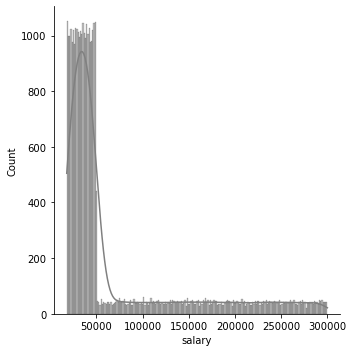

In [6]:
# graficamos los datos
sns.displot(df["salary"], kde = True, color = "grey");

Observamos que nuestros datos no forman una campana de Gauss, por lo tanto confirmamos que no son normales.